<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_2outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [84]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [85]:
df.shape

(104640, 74)

In [86]:
df =df.iloc[np.random.permutation(np.arange(104640).reshape(-1,60)).ravel()]

In [87]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/shuffled_data.csv',index=False)

In [88]:
df.shape

(104640, 74)

In [89]:
df.pop('song_id')
df.pop('frame_num')

83580     0
83581     1
83582     2
83583     3
83584     4
         ..
23935    55
23936    56
23937    57
23938    58
23939    59
Name: frame_num, Length: 104640, dtype: int64

In [90]:
y = df.loc[:,'valence':'arousal']
print(y.shape)
y.head()

(104640, 2)


,valence,arousal
83580,0.280,0.186
83581,0.270,0.180
83582,0.270,0.179
83583,0.266,0.185
83584,0.277,0.195


In [91]:
df.pop('valence')
df.pop('arousal')

83580    0.186000
83581    0.180000
83582    0.179000
83583    0.185000
83584    0.195000
           ...   
23935    0.418972
23936    0.419945
23937    0.422201
23938    0.420012
23939    0.423695
Name: arousal, Length: 104640, dtype: float64

In [92]:
df.head()


,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5
83580,0.116699,0.040661,2589.507766,3173.083608,7245.922852,17.222860,0.023228,0.007736,-480.703339,95.413696,25.494251,-1.134344,7.870078,0.421545,-0.179795,-4.017103,-1.057959,6.777999,2.140524,-0.172323,10.000395,5.798437,-13.659386,-11.537569,-7.063612,9.984604,2.117878,-4.368652,0.603777,0.472645,0.114409,0.356205,0.277413,0.095757,0.778267,0.298994,0.218311,0.943858,0.803884,0.338098,1.000000,0.305104,0.218189,0.804010,1.000000,0.182365,0.587573,0.164276,0.148377,0.312299,0.698318,0.403359,0.296375,0.483396,0.445889,0.299286,0.420782,0.456792,0.521514,0.244809,0.307359,0.895231,0.187721,0.219656,-0.128099,0.234069,-0.001544,0.103235,-0.035925,0.010612
83581,0.098633,0.092328,2560.672397,3201.457718,7138.256836,14.491025,0.013728,0.769424,-127.074951,90.042755,47.403107,5.561289,12.143234,8.853622,0.800835,-7.322828,-1.202715,10.283155,-3.214565,15.842824,5.963342,-16.907555,-18.562653,-7.680875,-5.029624,4.165542,-13.610606,-8.665774,0.159615,0.443624,0.113773,0.054560,0.243241,0.096927,0.089573,0.209872,0.219061,0.309337,0.282816,0.336601,0.257632,0.326073,0.219507,0.761643,0.530398,0.178286,0.228157,0.443632,0.151328,0.177258,0.345418,0.407725,0.330467,0.468078,0.452832,0.508006,0.739074,0.455092,1.000000,1.000000,0.298278,0.580764,0.682941,0.214776,-0.029003,0.039313,-0.007795,0.039567,-0.009511,0.010556
83582,0.081055,0.077303,2405.462082,3182.594961,6998.291016,17.948924,0.005882,0.062644,-189.316589,86.792465,53.265774,7.370489,15.424246,8.460559,-9.500628,4.419330,5.235051,12.008986,-1.215885,-2.231694,2.513477,-11.695314,-32.228291,-17.511145,-1.238786,6.861938,-15.215223,-16.831120,0.018165,0.154062,0.113029,0.012768,0.159598,0.098043,0.204293,0.299289,0.219898,0.767768,0.503052,0.335030,0.164427,0.345792,0.221259,0.046997,0.235050,0.174588,0.110049,0.290327,0.154015,0.479217,0.701395,0.412089,1.000000,1.000000,0.459621,0.437201,0.642001,0.452945,0.128728,0.291269,0.289232,0.042263,0.196254,0.209695,-0.006230,0.004649,0.001659,-0.003278,-0.010990,0.006442
83583,0.052734,0.078451,2152.511404,3090.203254,6610.693359,15.041960,0.006839,0.199004,-185.151443,92.419701,42.037445,8.643300,33.559834,23.228642,2.021552,5.777211,-2.517281,4.521847,-8.332518,0.559639,1.780349,-3.551206,-12.608234,-16.974121,-17.696568,-1.727344,-11.224493,-15.580039,0.171332,0.204379,0.112319,0.105472,0.273339,0.099222,0.145579,0.311340,0.220808,0.271234,0.354314,0.333446,0.141657,0.323589,0.223448,0.134838,0.290717,0.171200,0.101027,0.234913,0.156424,0.196330,0.259312,0.416238,0.514361,0.377323,0.466104,0.794181,0.686183,0.450394,1.000000,1.000000,0.280510,0.627833,0.572461,0.204554,-0.015040,-0.018852,-0.058715,-0.049818,-0.001239,0.009188
83584,0.053223,0.095996,2079.033978,2728.396140,5512.500000,21.311641,0.007155,0.063145,-155.585342,89.524673,22.436508,27.207224,7.371270,7.234667,-8.798056,1.196674,-4.990194,-2.051505,-11.892362,3.650327,5.510827,1.014205,-7.335122,-13.480433,-16.279385,-6.637849,-19.189285,-15.531263,0.145690,0.237828,0.111759,0.060977,0.182150,0.100751,0.196809,0.241070,0.221798,0.500840,0.259328,0.331824,0.101436,0.191589,0.225996,0.145973,0.212567,0.168079,0.056696,0.164552,0.158654,0.107558,0.208145,0.420

In [93]:
# df_mean = df.mean()
# df_std = df.std()

# df = (df - df_mean) / df_std


In [94]:
# print(type(df))

In [95]:
features = df.to_numpy()
y = y.to_numpy()

In [96]:
print(features.shape)
print(y.shape)

(104640, 70)
(104640, 2)


In [97]:
features = features.reshape(1744,60,70)
y = y.reshape(1744,60,2)

In [98]:
train_X , train_y = features[0:1098] , y[0:1098]
val_X, val_y = features[1098:1220] , y[1098:1220]
test_X , test_y = features[1220:1744] , y[1220:1744]
# val_X , val_y = features [1569:1744] , valence[0:1220]

In [99]:
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)


train_X : (1098, 60, 70) train_y shape: (1098, 60, 2)
test_X : (524, 60, 70) test_y shape: (524, 60, 2)
val_X : (122, 60, 70) val_y shape: (122, 60, 2)


In [100]:
model = Sequential()

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))




model.add(Dense(2))
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [101]:
history = model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), verbose=2, shuffle=False)


Epoch 1/100
35/35 - 2s - loss: 0.1246 - accuracy: 0.5235 - val_loss: 0.0561 - val_accuracy: 0.5975
Epoch 2/100
35/35 - 1s - loss: 0.0607 - accuracy: 0.5674 - val_loss: 0.0489 - val_accuracy: 0.5959
Epoch 3/100
35/35 - 1s - loss: 0.0533 - accuracy: 0.5909 - val_loss: 0.0478 - val_accuracy: 0.6119
Epoch 4/100
35/35 - 1s - loss: 0.0507 - accuracy: 0.5977 - val_loss: 0.0475 - val_accuracy: 0.6167
Epoch 5/100
35/35 - 1s - loss: 0.0483 - accuracy: 0.6059 - val_loss: 0.0470 - val_accuracy: 0.6167
Epoch 6/100
35/35 - 1s - loss: 0.0469 - accuracy: 0.6150 - val_loss: 0.0453 - val_accuracy: 0.6324
Epoch 7/100
35/35 - 1s - loss: 0.0452 - accuracy: 0.6273 - val_loss: 0.0454 - val_accuracy: 0.6292
Epoch 8/100
35/35 - 1s - loss: 0.0446 - accuracy: 0.6275 - val_loss: 0.0444 - val_accuracy: 0.6331
Epoch 9/100
35/35 - 1s - loss: 0.0435 - accuracy: 0.6262 - val_loss: 0.0448 - val_accuracy: 0.6340
Epoch 10/100
35/35 - 1s - loss: 0.0433 - accuracy: 0.6338 - val_loss: 0.0460 - val_accuracy: 0.6143
Epoch 11/

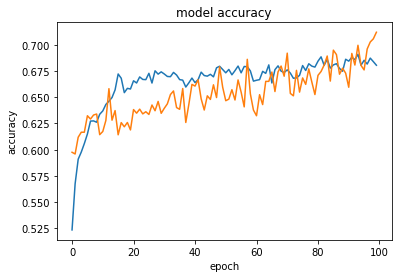

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

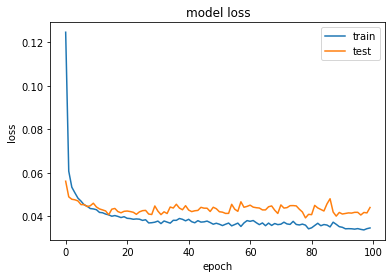

In [103]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [104]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.03893384050577879
overall val_loss 0.04330978665500879


In [105]:
predicted_y = model.predict(test_X)


In [106]:
print(predicted_y.shape)
print(test_y.shape)

(524, 60, 2)
(524, 60, 2)


In [107]:
predicted_valence = predicted_y[:,:,0]
predicted_arousal = predicted_y[:,:,1]
test_valence = test_y[:,:,0]
test_arousal = test_y[:,:,1]

In [108]:
# for i in range(1):
  # print(predicted_valence[i])
  # print(predicted_arousal[i])
  # print(test_valence[i])
  # print(test_arousal[i])

In [109]:
predicted_valence = predicted_valence.reshape(31440,)
test_valence = test_valence.reshape(31440,)
predicted_arousal = predicted_arousal.reshape(31440,)
test_arousal = test_arousal.reshape(31440,)

In [110]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  
  print('RMSE : ',rmse)
  print('Pearson : ',pearson_corr)
  print('MAE : ',mae)
  print('R2 : ',r2)
  print('Spearman : ',spearman_corr,'\n')


In [111]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

valence 
RMSE :  0.2116575017121943
Pearson :  (0.4543741334258506, 0.0)
MAE :  0.1723944694100778
R2 :  0.1812943992035022
Spearman :  SpearmanrResult(correlation=0.45285098939993707, pvalue=0.0) 



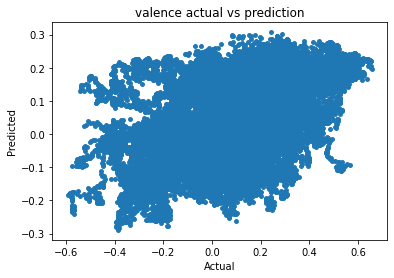

In [112]:
metrics(test_valence,predicted_valence,'valence')
graph_results(test_valence,predicted_valence,'valence actual vs prediction')


arousal 
RMSE :  0.1842709657269675
Pearson :  (0.7921103075603697, 0.0)
MAE :  0.14811552569372619
R2 :  0.5603161655850549
Spearman :  SpearmanrResult(correlation=0.7949541794086749, pvalue=0.0) 



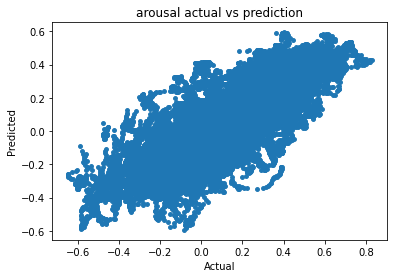

In [113]:
metrics(test_arousal,predicted_arousal,'arousal')
graph_results(test_arousal,predicted_arousal,'arousal actual vs prediction')